Name: Lachin Naghashyar          
Student ID: 98119179

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [3]:
import numpy as np

def camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T):
    """
    Computes the camera matrix from intrinsic and extrinsic parameters.

    Args:
    - landa (float): Scale factor for the camera.
    - f (float): Focal length of the camera.
    - Sx, Sy (float): Scale factors for the x and y coordinates.
    - S_theta (float): Skew coefficient.
    - Ox, Oy (float): Optical center coordinates.
    - R (ndarray): Rotation matrix (3x3).
    - T (ndarray): Translation vector (3x1).

    """
    # Intrinsic matrix
    K = np.array([[landa*f*Sx, landa*f*S_theta, Ox],
                  [0, landa*f*Sy, Oy],
                  [0, 0, 1]])

    # Extrinsic matrix
    extrinsic = np.hstack((R, T))

    # Camera matrix (K * [R|T])
    return np.dot(K, extrinsic)

def camera_projection(X, Y, Z, matrix):
    """
    Projects a 3D point to 2D using the camera matrix.

    Args:
    - X, Y, Z (float): 3D coordinates of the point.
    - matrix (ndarray): Camera matrix (3x4).

    """
    # 3D point in homogeneous coordinates
    point_3D = np.array([X, Y, Z, 1])

    # Apply the camera matrix
    point_2D = np.dot(matrix, point_3D)

    # Convert from homogeneous to cartesian coordinates
    point_2D /= point_2D[2]

    return point_2D[0], point_2D[1]


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [4]:
f = 100
Sx, Sy = 1, 1
S_theta = 0
Ox, Oy = 50, 50
R = np.eye(3)
T = np.array([[-1], [-1], [3]])

camera_mat = camera_matrix(1, f, Sx, Sy, S_theta, Ox, Oy, R, T)
print(camera_mat)

[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

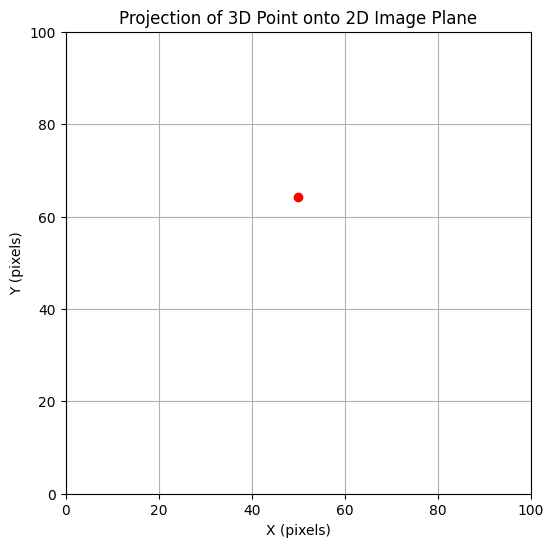

array([50.        , 64.28571429])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([0, 1, 1])
location = np.array([1, 1, 3])
point_3D = location + V
point_3D_homogeneous = np.array([point_3D[0], point_3D[1], point_3D[2], 1])

point_2D_homogeneous = np.dot(camera_mat, point_3D_homogeneous)
point_2D = point_2D_homogeneous[:2] / point_2D_homogeneous[2]

# Plotting the result
plt.figure(figsize=(6, 6))
plt.plot(point_2D[0], point_2D[1], 'ro')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.title('Projection of 3D Point onto 2D Image Plane')
plt.grid(True)
plt.show()

point_2D


**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

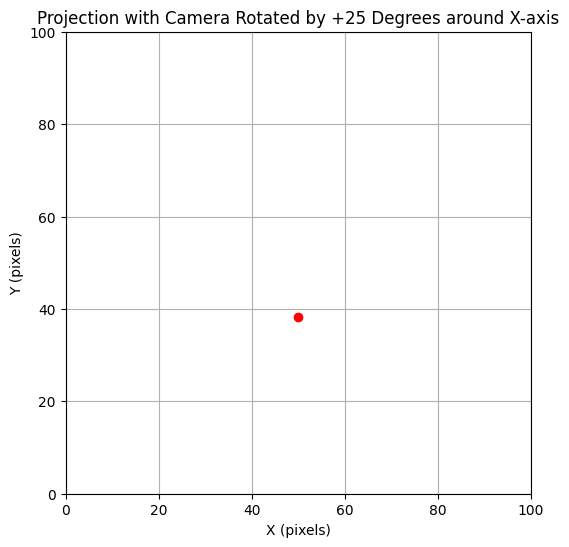

array([50.        , 38.24896229])

In [9]:
f = 100
Sx, Sy = 1, 1
S_theta = 0
Ox, Oy = 50, 50

K = np.array([[f*Sx, f*S_theta, Ox],
              [0,     f*Sy,    Oy],
              [0,     0,       1]])

theta = np.radians(25)
R_x = np.array([[1, 0, 0],
                [0, np.cos(theta), -np.sin(theta)],
                [0, np.sin(theta), np.cos(theta)]])

new_camera_mat = np.dot(K, np.concatenate((R_x, T), axis=1))

# Projecting the same 3D point using the new camera matrix
new_point_2D_homogeneous = np.dot(new_camera_mat, point_3D_homogeneous)
new_point_2D = new_point_2D_homogeneous[:2] / new_point_2D_homogeneous[2]

# Plotting the result with the new camera matrix
plt.figure(figsize=(6, 6))
plt.plot(new_point_2D[0], new_point_2D[1], 'ro')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.title('Projection with Camera Rotated by +25 Degrees around X-axis')
plt.grid(True)
plt.show()

new_point_2D  # Displaying the new projected 2D point in pixel coordinates

